# Assignment 3: Exploratory Data Analysis of Row Crop Fields

## 1. Data Ingestion & Inspection

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(style="whitegrid", palette="YlGn")

# Load data merged from Assignment 2
df = gpd.read_file('../data/assignment-02/fields_with_crops.geojson')

# Load and merge soil data
import os
soil_file = '../data/assignment-02/soil_EPSG4326.csv'
if os.path.exists(soil_file):
    soil_df = pd.read_csv(soil_file)
    df = df.merge(soil_df, on='field_id', how='left')

# Basic info
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   field_id       30 non-null     str           
 1   crop_2023_x    30 non-null     str           
 2   acres          30 non-null     float64       
 3   yield_2023     30 non-null     int32         
 4   owner          30 non-null     str           
 5   planting_date  30 non-null     datetime64[ms]
 6   soil_type      30 non-null     str           
 7   crop_2020      30 non-null     str           
 8   crop_2021      30 non-null     str           
 9   crop_2022      30 non-null     str           
 10  crop_2023_y    30 non-null     str           
 11  geometry       30 non-null     geometry      
 12  dominant_soil  30 non-null     str           
 13  om_pct         30 non-null     float64       
 14  ph_water       30 non-null     float64       
dtypes: datetime64[ms]

## Basic Statistics
Checking the summary statistics of the numeric fields.

In [2]:
df.describe()

,acres,yield_2023,planting_date,om_pct,ph_water
count,30.00000,30.000000,30,30.000000,30.000000
mean,39.84900,183.733333,2023-05-15 14:24:00,3.556667,6.670000
min,38.25000,146.000000,2023-05-01 00:00:00,2.100000,6.000000
25%,38.84250,175.500000,2023-05-08 00:00:00,2.900000,6.325000
50%,39.55500,184.000000,2023-05-16 00:00:00,3.350000,6.700000
75%,40.90750,192.250000,2023-05-24 18:00:00,4.200000,7.000000
max,41.79000,213.000000,2023-05-28 00:00:00,5.400000,7.500000
std,1.20286,17.965356,NaN,0.943100,0.428429


## 2. Visual Exploration (The "3 Visuals" Task)

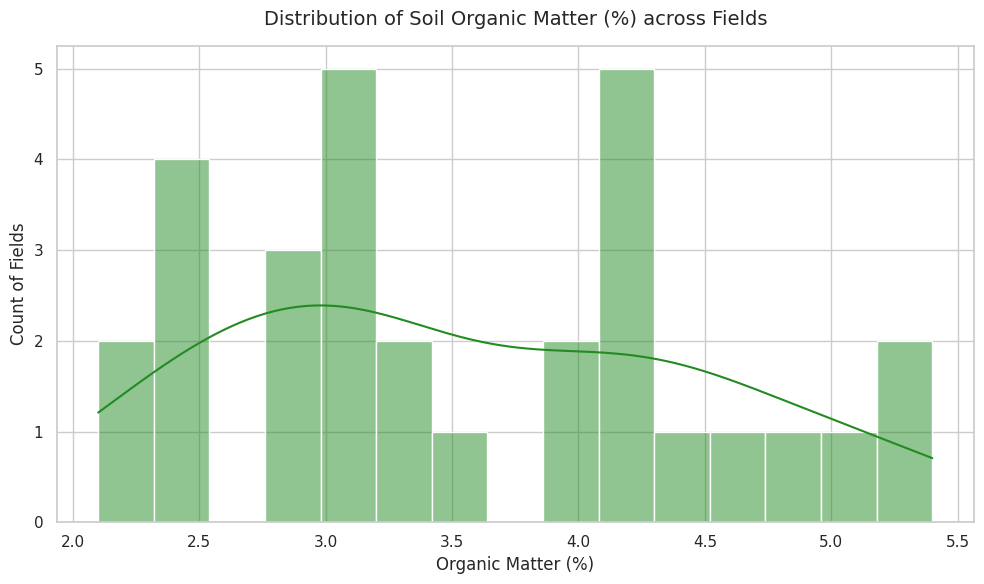

In [3]:
# Visual 1 (Distribution): Soil Organic Matter
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='om_pct', bins=15, kde=True, color='forestgreen')
plt.title('Distribution of Soil Organic Matter (%) across Fields', fontsize=14, pad=15)
plt.xlabel('Organic Matter (%)', fontsize=12)
plt.ylabel('Count of Fields', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_57771/1428361065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dominant_soil', y='acres', palette='YlOrBr')


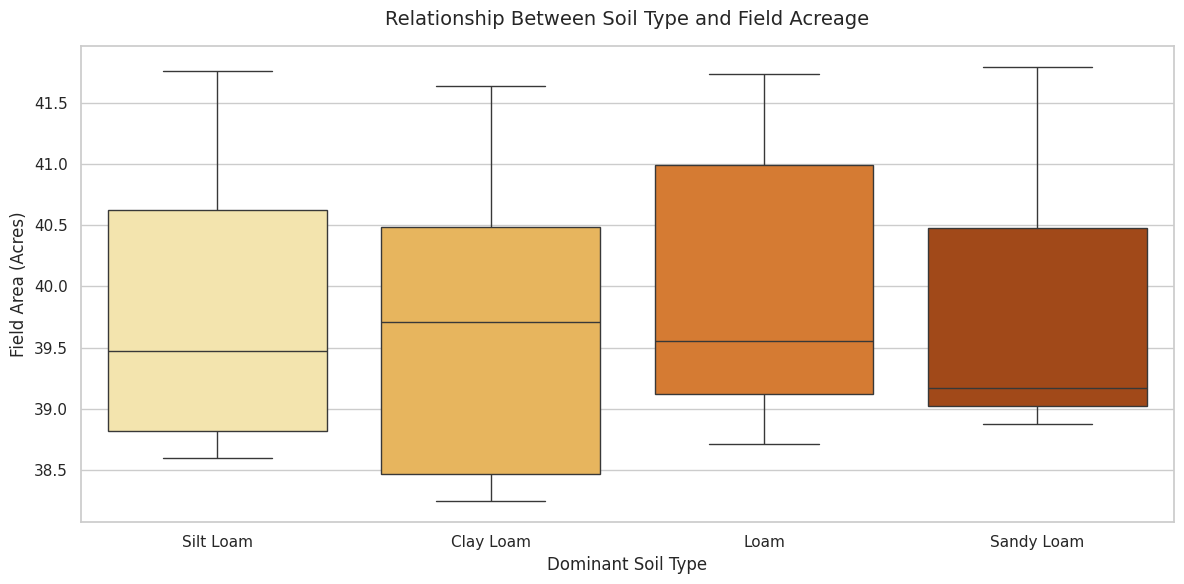

In [4]:
# Visual 2 (Relationship): Soil Type vs Acreage
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='dominant_soil', y='acres', palette='YlOrBr')
plt.title('Relationship Between Soil Type and Field Acreage', fontsize=14, pad=15)
plt.xlabel('Dominant Soil Type', fontsize=12)
plt.ylabel('Field Area (Acres)', fontsize=12)
plt.tight_layout()
plt.show()

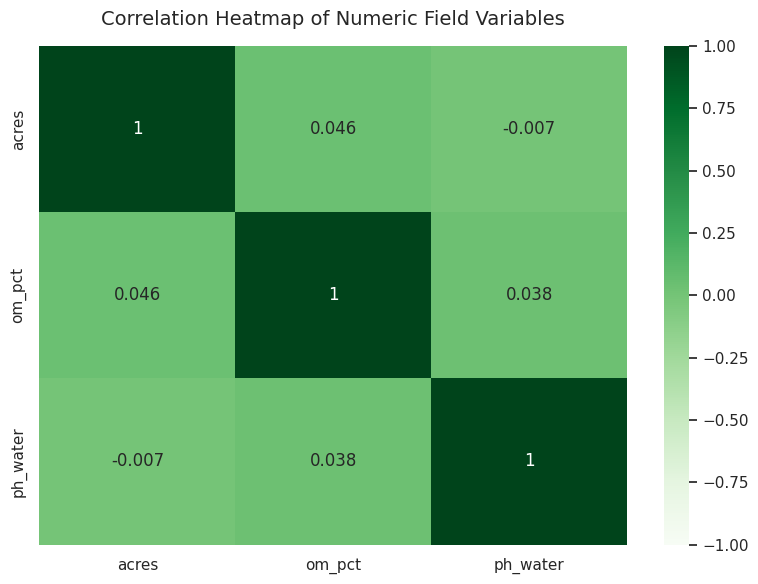

In [5]:
# Visual 3 (Correlation): Numerical features Heatmap
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation (in actual scenario, we convert strings or handle na)
numeric_cols = ['acres', 'om_pct', 'ph_water']
corr = df[numeric_cols].astype(float).corr()

sns.heatmap(corr, annot=True, cmap='Greens', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Field Variables', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

## 3. High-Res Map Export for Dashboard

In [6]:
import os
os.makedirs('../output/dashboard_assets', exist_ok=True)

# 1. Export High-Res Organic Matter Plot
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(data=df, x='om_pct', bins=15, kde=True, color='#2ca02c') # agricultural green
plt.title('Soil Organic Matter Distribution', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Organic Matter (%)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Fields', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../output/dashboard_assets/01_om_distribution.png')
plt.close()

# 2. Export High-Res Soil vs Acreage Boxplot
plt.figure(figsize=(12, 6), dpi=300)
sns.boxplot(data=df, x='dominant_soil', y='acres', palette='YlOrBr') # soil brown palette
plt.title('Field Acreage by Dominant Soil Type', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Soil Classification', fontsize=12, fontweight='bold')
plt.ylabel('Total Area (Acres)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../output/dashboard_assets/02_soil_acreage_boxplot.png')
plt.close()

print('✅ High-res dashboard assets saved to output/dashboard_assets/')

/tmp/ipykernel_57771/3577842042.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dominant_soil', y='acres', palette='YlOrBr') # soil brown palette


✅ High-res dashboard assets saved to output/dashboard_assets/
